In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

## Training Validation with Training Data

In [3]:
df_train=pd.read_csv(r"C:\Users\abhishekgh\Desktop\ExcelR\Titanic_train.csv")

In [4]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df_train.size

10692

In [6]:
df_train.shape

(891, 12)

In [7]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df_train.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [11]:
df_train[df_train.duplicated]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [12]:
target=df_train[['Survived']]
target

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [13]:
feature=df_train.drop(columns=['Survived','Cabin','PassengerId'],axis=1)
feature

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


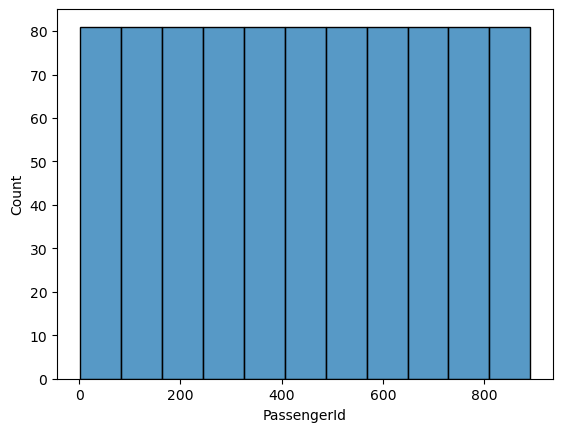

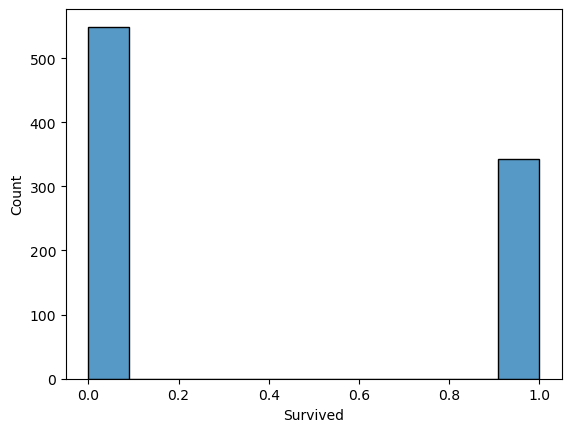

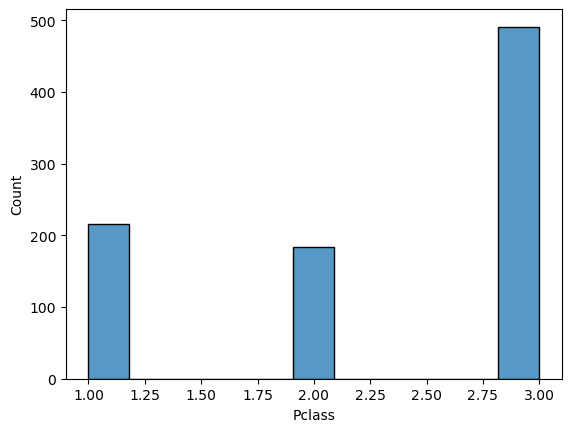

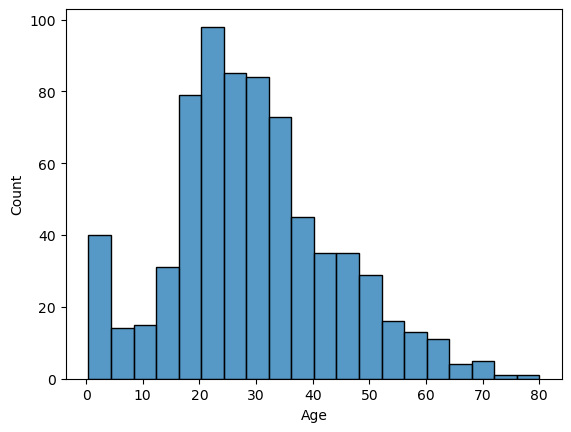

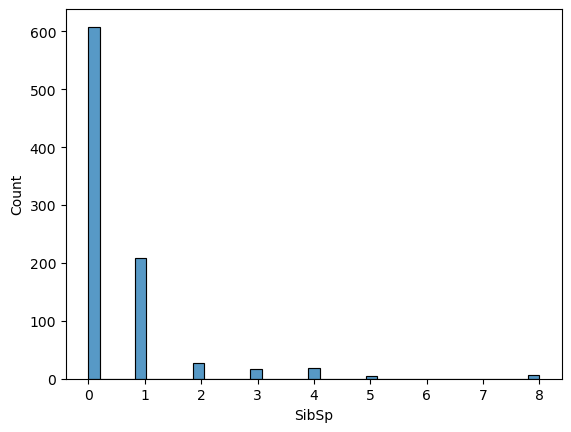

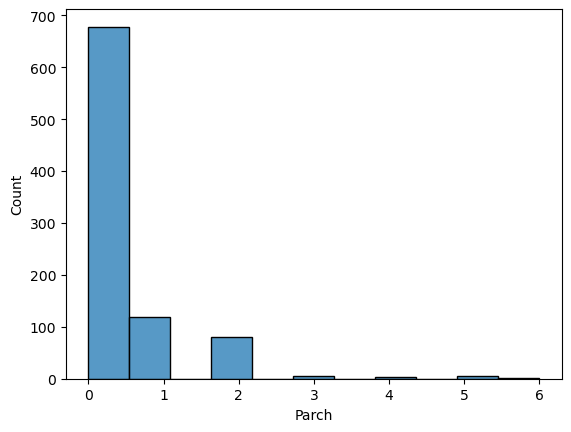

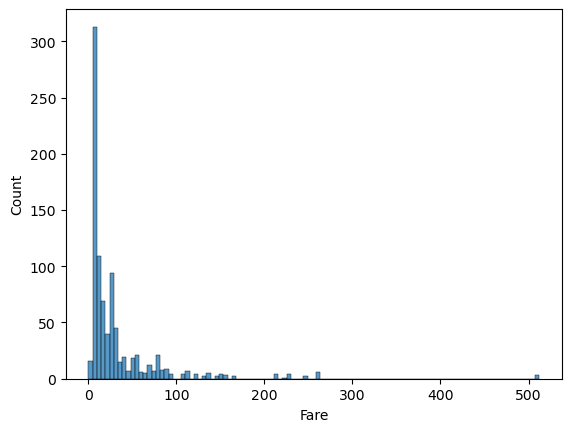

In [14]:
for i in df_train.select_dtypes(include='number').columns:
    sns.histplot(data=df_train,x=i)
    plt.show()

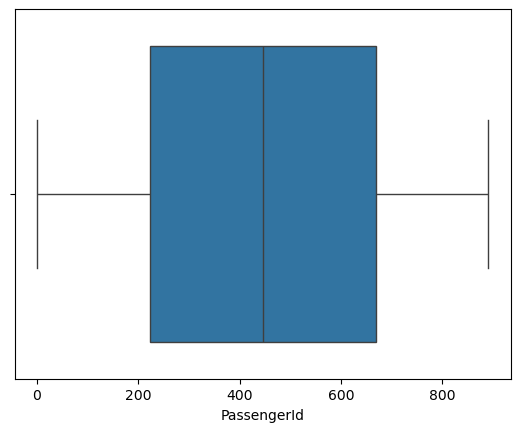

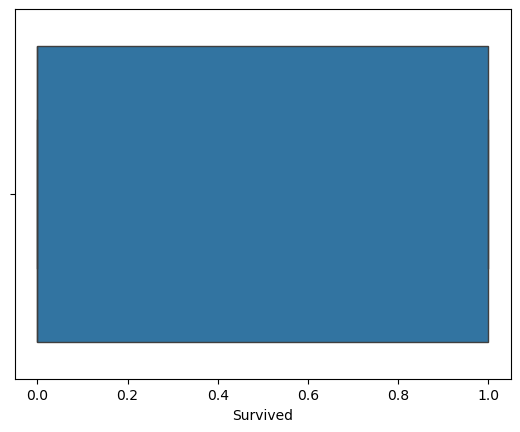

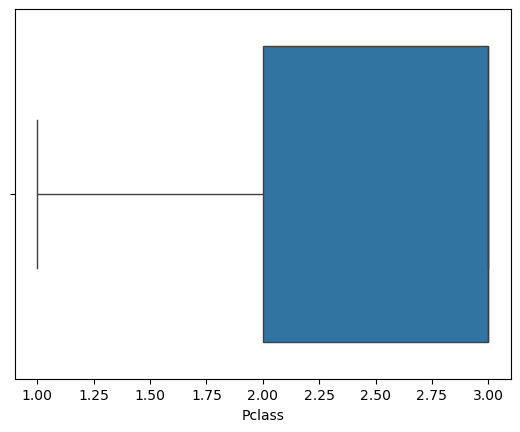

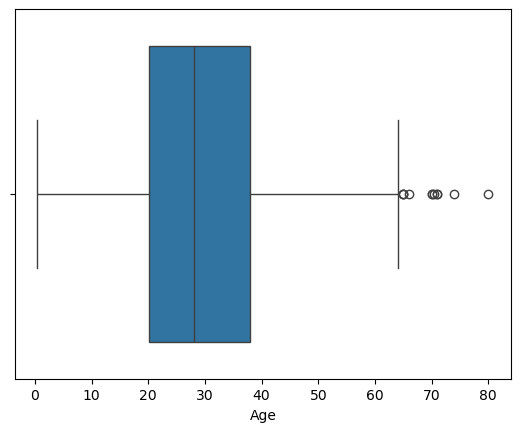

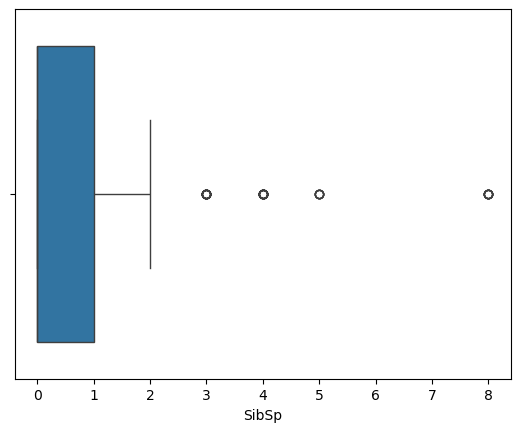

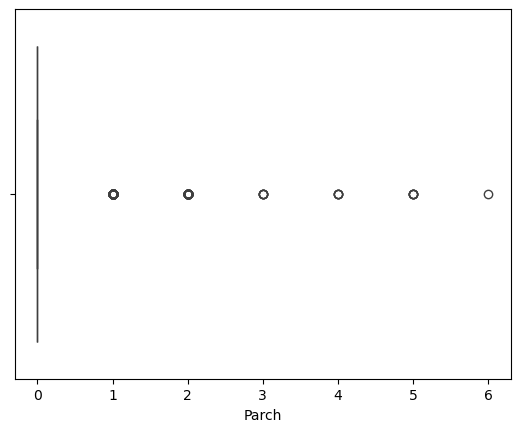

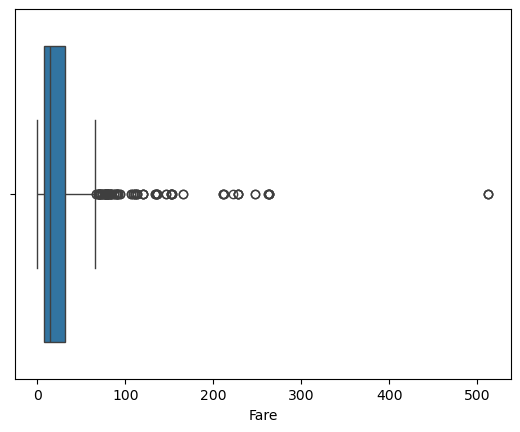

In [15]:
for i in df_train.select_dtypes(include='number').columns:
    sns.boxplot(data=df_train,x=i)
    plt.show()

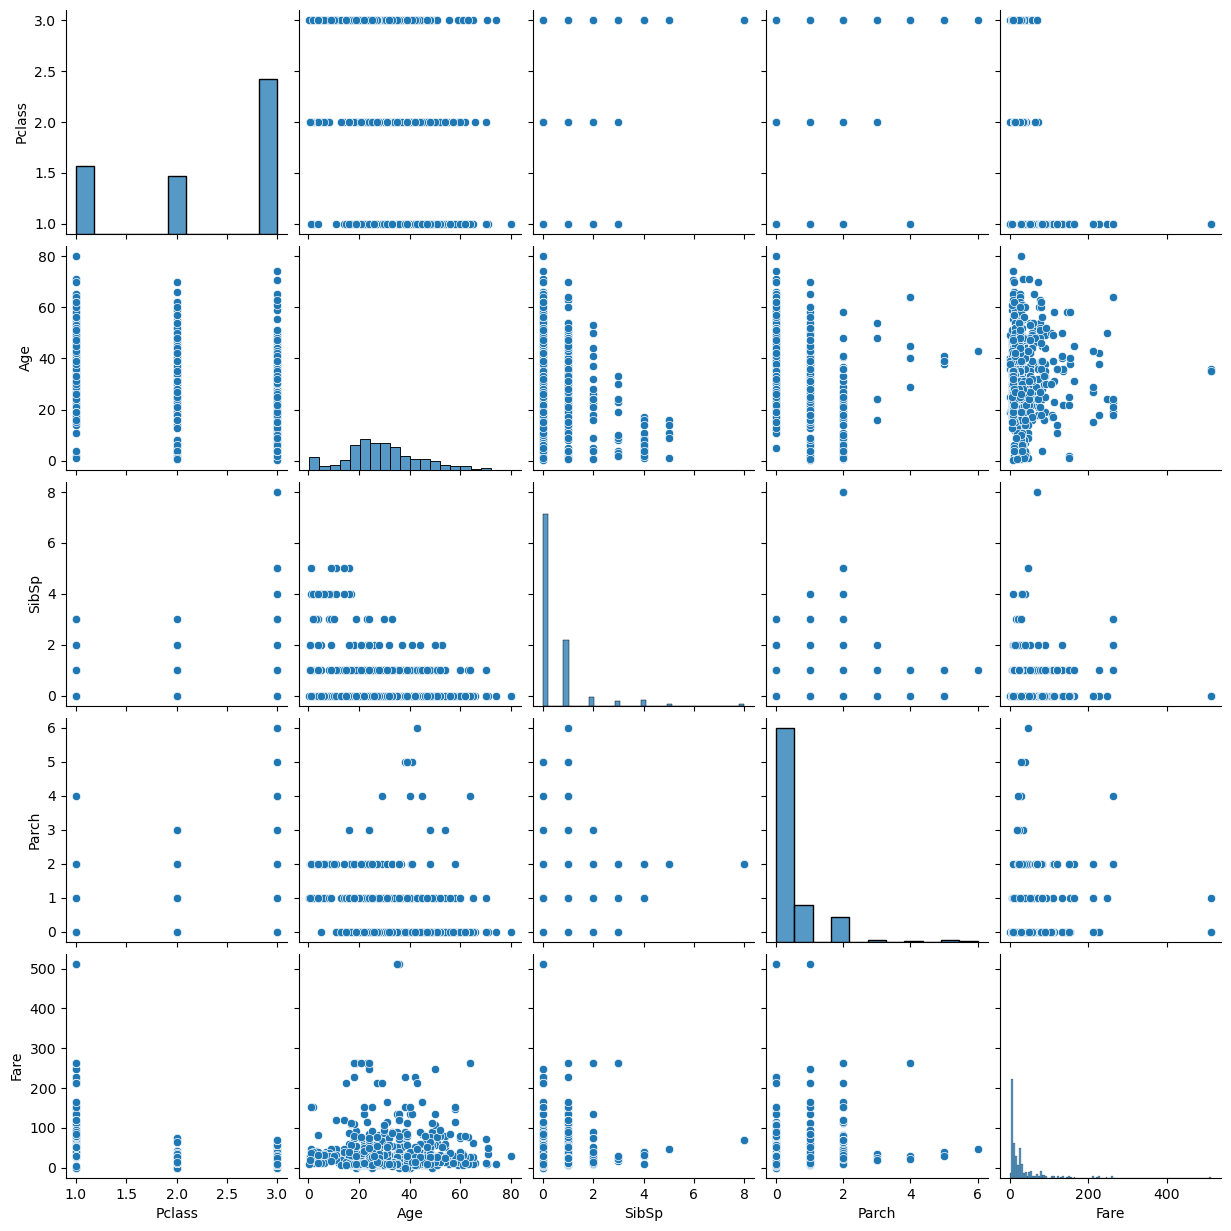

In [36]:
sns.pairplot(data=feature)
plt.show()

In [37]:
cat_col=[i for i in feature.columns if feature[i].dtypes=='O']
num_col=[i for i in feature.columns if feature[i].dtypes!='O']

In [38]:
cat_col

['Name', 'Sex', 'Ticket', 'Embarked']

In [39]:
feature[cat_col]

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S
...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,S
887,"Graham, Miss. Margaret Edith",female,112053,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,S
889,"Behr, Mr. Karl Howell",male,111369,C


In [40]:
num_col

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [41]:
feature[num_col]

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
...,...,...,...,...,...
886,2,27.0,0,0,13.0000
887,1,19.0,0,0,30.0000
888,3,NaN,1,2,23.4500
889,1,26.0,0,0,30.0000


In [42]:
ord_enc=make_pipeline(OrdinalEncoder())

In [43]:
transformer=ColumnTransformer([('ord_enc',ord_enc,cat_col)])

In [44]:
transformer.get_feature_names_out

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(transformers=[('ord_enc',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['Name', 'Sex', 'Ticket', 'Embarked'])])>

In [179]:
df1_train=pd.DataFrame(transformer.fit_transform(feature))

In [181]:
df1_train

,0,1,2,3
0,108.0,1.0,523.0,2.0
1,190.0,0.0,596.0,0.0
2,353.0,0.0,669.0,2.0
3,272.0,0.0,49.0,2.0
4,15.0,1.0,472.0,2.0
...,...,...,...,...
886,548.0,1.0,101.0,2.0
887,303.0,0.0,14.0,2.0
888,413.0,0.0,675.0,2.0
889,81.0,1.0,8.0,0.0


In [58]:
df1_train.isnull().sum()

0    0
1    0
2    0
3    2
dtype: int64

In [60]:
simple_imput=SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [62]:
df1_train=pd.DataFrame(simple_imput.fit_transform(df1_train))

In [64]:
df1_train

,0,1,2,3
0,108.0,1.0,523.0,2.0
1,190.0,0.0,596.0,0.0
2,353.0,0.0,669.0,2.0
3,272.0,0.0,49.0,2.0
4,15.0,1.0,472.0,2.0
...,...,...,...,...
886,548.0,1.0,101.0,2.0
887,303.0,0.0,14.0,2.0
888,413.0,0.0,675.0,2.0
889,81.0,1.0,8.0,0.0


In [66]:
df1_train.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [68]:
simple_imput1=SimpleImputer(missing_values=np.nan,strategy='mean')

In [70]:
df2_train=pd.DataFrame(simple_imput1.fit_transform(feature[num_col]))

In [72]:
df2_train

,0,1,2,3,4
0,3.0,22.000000,1.0,0.0,7.2500
1,1.0,38.000000,1.0,0.0,71.2833
2,3.0,26.000000,0.0,0.0,7.9250
3,1.0,35.000000,1.0,0.0,53.1000
4,3.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...
886,2.0,27.000000,0.0,0.0,13.0000
887,1.0,19.000000,0.0,0.0,30.0000
888,3.0,29.699118,1.0,2.0,23.4500
889,1.0,26.000000,0.0,0.0,30.0000


In [74]:
std_scaler=StandardScaler()

In [76]:
df2_train=pd.DataFrame(std_scaler.fit_transform(df2_train))

In [78]:
df2_train

,0,1,2,3,4
0,0.827377,-0.592481,0.432793,-0.473674,-0.502445
1,-1.566107,0.638789,0.432793,-0.473674,0.786845
2,0.827377,-0.284663,-0.474545,-0.473674,-0.488854
3,-1.566107,0.407926,0.432793,-0.473674,0.420730
4,0.827377,0.407926,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...
886,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671
887,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381
888,0.827377,0.000000,0.432793,2.008933,-0.176263
889,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381


In [80]:
feature1=pd.concat([df1_train,df2_train],axis=1,ignore_index=True)

In [82]:
feature1

,0,1,2,3,4,5,6,7,8
0,108.0,1.0,523.0,2.0,0.827377,-0.592481,0.432793,-0.473674,-0.502445
1,190.0,0.0,596.0,0.0,-1.566107,0.638789,0.432793,-0.473674,0.786845
2,353.0,0.0,669.0,2.0,0.827377,-0.284663,-0.474545,-0.473674,-0.488854
3,272.0,0.0,49.0,2.0,-1.566107,0.407926,0.432793,-0.473674,0.420730
4,15.0,1.0,472.0,2.0,0.827377,0.407926,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...,...,...,...,...
886,548.0,1.0,101.0,2.0,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671
887,303.0,0.0,14.0,2.0,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381
888,413.0,0.0,675.0,2.0,0.827377,0.000000,0.432793,2.008933,-0.176263
889,81.0,1.0,8.0,0.0,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381


In [84]:
correlation=feature1.corr()
correlation

,0,1,2,3,4,5,6,7,8
0,1.000000,0.020314,0.047348,-0.006117,0.052831,0.057466,-0.017230,-0.049105,-0.049173
1,0.020314,1.000000,0.059372,0.108262,0.131900,0.084153,-0.114631,-0.245489,-0.182333
2,0.047348,0.059372,1.000000,-0.001729,0.319869,-0.068848,0.079461,0.020003,-0.013885
3,-0.006117,0.108262,-0.001729,1.000000,0.162098,-0.026749,0.068230,0.039798,-0.224719
4,0.052831,0.131900,0.319869,0.162098,1.000000,-0.331339,0.083081,0.018443,-0.549500
5,0.057466,0.084153,-0.068848,-0.026749,-0.331339,1.000000,-0.232625,-0.179191,0.091566
6,-0.017230,-0.114631,0.079461,0.068230,0.083081,-0.232625,1.000000,0.414838,0.159651
7,-0.049105,-0.245489,0.020003,0.039798,0.018443,-0.179191,0.414838,1.000000,0.216225
8,-0.049173,-0.182333,-0.013885,-0.224719,-0.549500,0.091566,0.159651,0.216225,1.000000


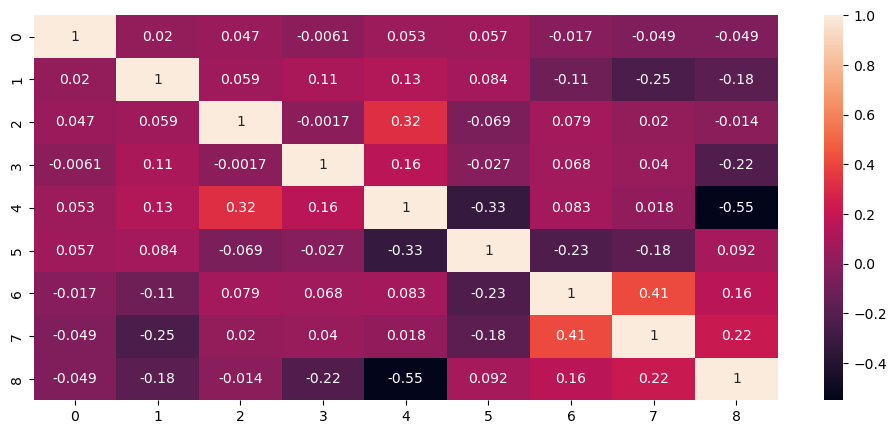

In [86]:
plt.figure(figsize=(12,5))
sns.heatmap(correlation,annot=True)
plt.show()

In [249]:
df=pd.read_csv(r"C:\Users\abhishekgh\Desktop\ExcelR\Titanic_test.csv")
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [251]:
df=df.drop(columns=['Cabin','PassengerId'],axis=1)
df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [253]:
df.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

In [255]:
cat_col=[i for i in feature.columns if feature[i].dtypes=='O']
num_col=[i for i in feature.columns if feature[i].dtypes!='O']

In [257]:
df[cat_col]

,Name,Sex,Ticket,Embarked
0,"Kelly, Mr. James",male,330911,Q
1,"Wilkes, Mrs. James (Ellen Needs)",female,363272,S
2,"Myles, Mr. Thomas Francis",male,240276,Q
3,"Wirz, Mr. Albert",male,315154,S
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,3101298,S
...,...,...,...,...
413,"Spector, Mr. Woolf",male,A.5. 3236,S
414,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C
415,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,S
416,"Ware, Mr. Frederick",male,359309,S


In [259]:
df[num_col]

,Pclass,Age,SibSp,Parch,Fare
0,3,34.5,0,0,7.8292
1,3,47.0,1,0,7.0000
2,2,62.0,0,0,9.6875
3,3,27.0,0,0,8.6625
4,3,22.0,1,1,12.2875
...,...,...,...,...,...
413,3,NaN,0,0,8.0500
414,1,39.0,0,0,108.9000
415,3,38.5,0,0,7.2500
416,3,NaN,0,0,8.0500


In [261]:
ord_enc1=make_pipeline(OrdinalEncoder())

In [263]:
transformer=ColumnTransformer([('ord_enc',ord_enc1,cat_col)])

In [265]:
transformer.get_feature_names_out

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(transformers=[('ord_enc',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['Name', 'Sex', 'Ticket', 'Embarked'])])>

In [267]:
df1=pd.DataFrame(transformer.fit_transform(df))
df1

,0,1,2,3
0,206.0,1.0,152.0,1.0
1,403.0,0.0,221.0,2.0
2,269.0,1.0,73.0,1.0
3,408.0,1.0,147.0,2.0
4,178.0,0.0,138.0,2.0
...,...,...,...,...
413,353.0,1.0,267.0,2.0
414,283.0,0.0,324.0,0.0
415,332.0,1.0,346.0,2.0
416,384.0,1.0,220.0,2.0


In [275]:
df[cat_col].isnull().sum()

Name        0
Sex         0
Ticket      0
Embarked    0
dtype: int64

In [277]:
simple_impute2=SimpleImputer(missing_values=np.nan,strategy='median')

In [279]:
df2=pd.DataFrame(simple_impute2.fit_transform(df[num_col]))

In [281]:
df2

,0,1,2,3,4
0,3.0,34.5,0.0,0.0,7.8292
1,3.0,47.0,1.0,0.0,7.0000
2,2.0,62.0,0.0,0.0,9.6875
3,3.0,27.0,0.0,0.0,8.6625
4,3.0,22.0,1.0,1.0,12.2875
...,...,...,...,...,...
413,3.0,27.0,0.0,0.0,8.0500
414,1.0,39.0,0.0,0.0,108.9000
415,3.0,38.5,0.0,0.0,7.2500
416,3.0,27.0,0.0,0.0,8.0500


In [300]:
x_test1=pd.concat([df1,df2],axis=1,ignore_index=True)

In [312]:
x_test1

,0,1,2,3,4,5,6,7,8
0,206.0,1.0,152.0,1.0,3.0,34.5,0.0,0.0,7.8292
1,403.0,0.0,221.0,2.0,3.0,47.0,1.0,0.0,7.0000
2,269.0,1.0,73.0,1.0,2.0,62.0,0.0,0.0,9.6875
3,408.0,1.0,147.0,2.0,3.0,27.0,0.0,0.0,8.6625
4,178.0,0.0,138.0,2.0,3.0,22.0,1.0,1.0,12.2875
...,...,...,...,...,...,...,...,...,...
413,353.0,1.0,267.0,2.0,3.0,27.0,0.0,0.0,8.0500
414,283.0,0.0,324.0,0.0,1.0,39.0,0.0,0.0,108.9000
415,332.0,1.0,346.0,2.0,3.0,38.5,0.0,0.0,7.2500
416,384.0,1.0,220.0,2.0,3.0,27.0,0.0,0.0,8.0500


In [315]:
x_train,x_test,y_train,y_test=train_test_split(feature1,target,train_size=0.8,random_state=200)

In [317]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 9)
(179, 9)
(712, 1)
(179, 1)


## Logistic Regression Model

In [320]:
logistic_reg=LogisticRegression()

In [322]:
logistic_reg.fit(x_train,y_train)

C:\Users\abhishekgh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abhishekgh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [336]:
y_pred=logistic_reg.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0], dtype=int64)

In [338]:
accuracy_score(y_test,y_pred)

0.7541899441340782

In [340]:
y_pred1=logistic_reg.predict(x_test)
y_pred1

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0], dtype=int64)

In [342]:
logistic_reg.coef_

array([[ 2.15020367e-04, -2.66826147e+00, -2.44399613e-04,
        -2.47630102e-01, -1.04452938e+00, -5.10552792e-01,
        -2.52964533e-01, -2.02242987e-01, -1.16140001e-01]])

In [344]:
logistic_reg.intercept_

array([1.33679718])

In [346]:
accuracy_score(y_test,y_pred1)

0.7541899441340782

In [348]:
logistic_reg.predict_proba(x_test)

array([[0.77893445, 0.22106555],
       [0.934084  , 0.065916  ],
       [0.8972802 , 0.1027198 ],
       [0.89581891, 0.10418109],
       [0.27662637, 0.72337363],
       [0.4606126 , 0.5393874 ],
       [0.23042586, 0.76957414],
       [0.93233693, 0.06766307],
       [0.53303484, 0.46696516],
       [0.88139268, 0.11860732],
       [0.95897647, 0.04102353],
       [0.58689923, 0.41310077],
       [0.40317107, 0.59682893],
       [0.03377583, 0.96622417],
       [0.46146591, 0.53853409],
       [0.51805317, 0.48194683],
       [0.9589514 , 0.0410486 ],
       [0.04276331, 0.95723669],
       [0.7766102 , 0.2233898 ],
       [0.7250563 , 0.2749437 ],
       [0.63229842, 0.36770158],
       [0.8703291 , 0.1296709 ],
       [0.34546443, 0.65453557],
       [0.88393772, 0.11606228],
       [0.90040214, 0.09959786],
       [0.95455193, 0.04544807],
       [0.06527353, 0.93472647],
       [0.7275908 , 0.2724092 ],
       [0.2988091 , 0.7011909 ],
       [0.8862312 , 0.1137688 ],
       [0.

## Classification Report

In [351]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       104
           1       0.73      0.65      0.69        75

    accuracy                           0.75       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179



## ROC Curve

In [354]:
log_pred=logistic_reg.predict_proba(x_test)[:,1]
log_pred

array([0.22106555, 0.065916  , 0.1027198 , 0.10418109, 0.72337363,
       0.5393874 , 0.76957414, 0.06766307, 0.46696516, 0.11860732,
       0.04102353, 0.41310077, 0.59682893, 0.96622417, 0.53853409,
       0.48194683, 0.0410486 , 0.95723669, 0.2233898 , 0.2749437 ,
       0.36770158, 0.1296709 , 0.65453557, 0.11606228, 0.09959786,
       0.04544807, 0.93472647, 0.2724092 , 0.7011909 , 0.1137688 ,
       0.72165619, 0.64092873, 0.64023707, 0.08628532, 0.55927897,
       0.06525423, 0.75444394, 0.77470653, 0.17374763, 0.22789014,
       0.08169429, 0.09503087, 0.33017491, 0.92488346, 0.05866956,
       0.49177045, 0.14026589, 0.5321538 , 0.10628716, 0.07421649,
       0.36548936, 0.90531512, 0.93792185, 0.65545261, 0.96250575,
       0.7663834 , 0.77877323, 0.91802312, 0.6190171 , 0.09822462,
       0.80209917, 0.02935362, 0.3676509 , 0.77732145, 0.2581366 ,
       0.11552502, 0.0809739 , 0.29795876, 0.53126706, 0.06382132,
       0.10804463, 0.09584282, 0.24680737, 0.63654294, 0.43517

In [356]:
auc_score=roc_auc_score(y_test,log_pred)
auc_score

0.8006410256410256

In [358]:
fpr,tpr,thresould=roc_curve(y_test,log_pred)

In [360]:
fpr

array([0.        , 0.        , 0.        , 0.00961538, 0.00961538,
       0.01923077, 0.01923077, 0.02884615, 0.02884615, 0.03846154,
       0.03846154, 0.04807692, 0.04807692, 0.05769231, 0.05769231,
       0.07692308, 0.07692308, 0.08653846, 0.08653846, 0.10576923,
       0.10576923, 0.11538462, 0.11538462, 0.125     , 0.125     ,
       0.15384615, 0.15384615, 0.18269231, 0.18269231, 0.20192308,
       0.20192308, 0.21153846, 0.21153846, 0.22115385, 0.22115385,
       0.25961538, 0.25961538, 0.26923077, 0.26923077, 0.38461538,
       0.38461538, 0.48076923, 0.48076923, 0.52884615, 0.52884615,
       0.59615385, 0.59615385, 0.63461538, 0.63461538, 0.71153846,
       0.71153846, 0.82692308, 0.82692308, 0.83653846, 0.83653846,
       0.84615385, 0.84615385, 0.86538462, 0.86538462, 0.92307692,
       0.92307692, 0.95192308, 0.95192308, 1.        ])

In [362]:
tpr

array([0.        , 0.01333333, 0.16      , 0.16      , 0.26666667,
       0.26666667, 0.37333333, 0.37333333, 0.45333333, 0.45333333,
       0.48      , 0.48      , 0.49333333, 0.49333333, 0.52      ,
       0.52      , 0.54666667, 0.54666667, 0.56      , 0.56      ,
       0.57333333, 0.57333333, 0.6       , 0.6       , 0.64      ,
       0.64      , 0.65333333, 0.65333333, 0.68      , 0.68      ,
       0.72      , 0.72      , 0.73333333, 0.73333333, 0.74666667,
       0.74666667, 0.77333333, 0.77333333, 0.8       , 0.8       ,
       0.81333333, 0.81333333, 0.82666667, 0.82666667, 0.84      ,
       0.84      , 0.86666667, 0.86666667, 0.89333333, 0.89333333,
       0.90666667, 0.90666667, 0.92      , 0.92      , 0.93333333,
       0.93333333, 0.94666667, 0.94666667, 0.96      , 0.96      ,
       0.98666667, 0.98666667, 1.        , 1.        ])

In [364]:
thresould

array([       inf, 0.96622417, 0.91620367, 0.9119387 , 0.82084337,
       0.81917686, 0.76957414, 0.7663834 , 0.71626114, 0.71105382,
       0.69571186, 0.68190208, 0.66511486, 0.65545261, 0.64567033,
       0.64092873, 0.63654294, 0.63469145, 0.62660823, 0.61275402,
       0.61132075, 0.60474156, 0.59682893, 0.59596526, 0.55927897,
       0.53853409, 0.53273386, 0.49177045, 0.48194683, 0.46797289,
       0.46137284, 0.43517229, 0.42809923, 0.41900663, 0.41310077,
       0.33937034, 0.32851989, 0.31371709, 0.29795876, 0.24501527,
       0.22789014, 0.163505  , 0.15620188, 0.13384477, 0.1296709 ,
       0.11380783, 0.11009748, 0.10418109, 0.10158052, 0.08888912,
       0.08628532, 0.07534613, 0.07421649, 0.07238146, 0.07042474,
       0.06853893, 0.06766307, 0.065916  , 0.06525423, 0.05699082,
       0.05137948, 0.04544807, 0.04297788, 0.00750766])

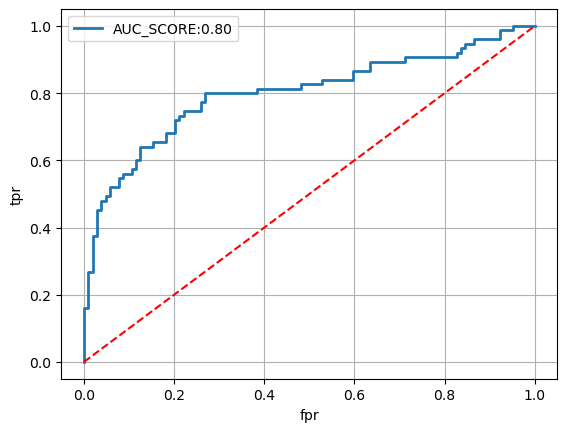

In [366]:
plt.plot(fpr,tpr,lw=2,label=f'AUC_SCORE:{auc_score:.2f}')
plt.legend(loc='best')
plt.plot([0,1],[0,1],linestyle='--',color='red')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.grid()

## Interview Questions

## 1. What is the difference between precision and recall?

a.Precision: The ratio of true positive results to the total predicted positive results. It measures how many of the predicted positive cases were actually correct.

Precision=True Positives / True Positives+False Positives

b.Recall: The ratio of true positive results to the total actual positive cases. It measures how many of the actual positive cases were correctly identified.

Recall=True Positives / True Positives+False Negatives


## 2. What is cross-validation, and why is it important in binary classification?

Cross-validation is a statistical method used to assess the generalizability of a model by dividing the dataset into multiple subsets. In the context of binary classification, it helps ensure that the model performs well not just on the training data but also on unseen data.

##Importance in Binary Classification

1.Prevents Overfitting: Cross-validation helps detect if a model is too complex and fitting noise in the training data, leading to poor performance on new data.

2.Model Selection: By comparing performance across different models or hyperparameters, cross-validation aids in selecting the best model.

3.Robust Performance Estimate: It provides a more reliable estimate of a model's accuracy, as it averages results over multiple runs rather than relying on a single train-test split.

4.Data Utilization: Cross-validation allows for better use of limited data, as all samples are used for both training and validation across different iterations.